In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = '/project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap'

In [3]:
# List all files in the folder
file_list = os.listdir(PATH_DATA)
# Filter the list to include only files of interest (e.g., files ending with '.h5')
file_list = [f for f in file_list if f.endswith('.h5')]
# Sort the file list if needed
file_list.sort()
print(file_list)

['2024-11-10_17-12_run1_gandalf_Test_samples_2336951.h5', '2024-11-10_18-43_run2_gandalf_Test_samples_2336837.h5', '2024-11-10_20-16_run3_gandalf_Test_samples_2337788.h5', '2024-11-10_21-19_run1_gandalf_Test_samples_2335342.h5', '2024-11-10_21-24_run2_gandalf_Test_samples_2336995.h5', '2024-11-10_21-28_run1_gandalf_Test_samples_2337355.h5', '2024-11-10_21-28_run2_gandalf_Test_samples_2337102.h5', '2024-11-10_21-28_run3_gandalf_Test_samples_2336363.h5', '2024-11-10_21-28_run3_gandalf_Test_samples_2337790.h5', '2024-11-10_21-28_run4_gandalf_Test_samples_2335373.h5', '2024-11-10_21-28_run5_gandalf_Test_samples_2336330.h5', '2024-11-10_21-33_run4_gandalf_Test_samples_2337859.h5', '2024-11-10_21-34_run10_gandalf_Test_samples_2336529.h5', '2024-11-10_21-34_run6_gandalf_Test_samples_2335580.h5', '2024-11-10_21-34_run7_gandalf_Test_samples_2336489.h5', '2024-11-10_21-34_run8_gandalf_Test_samples_2339214.h5', '2024-11-10_21-34_run9_gandalf_Test_samples_2338466.h5', '2024-11-10_21-38_run5_gandal

In [4]:
dict_means = {
    "unsheared/mag_r": [],
    "unsheared/mag_i": [],
    "unsheared/mag_z": [],
}

In [5]:
for file_number, filename in enumerate(file_list):
    # if file_number > 1:
    #     break
    print(f"{file_number + 1} of {len(file_list)} files")
    df_gandalf = pd.read_hdf(f"{PATH_DATA}/{filename}", mode='r')
    for col in dict_means.keys():
        dict_means[col].append(df_gandalf[col].mean())

1 of 103 files
2 of 103 files
3 of 103 files
4 of 103 files
5 of 103 files
6 of 103 files
7 of 103 files
8 of 103 files
9 of 103 files
10 of 103 files
11 of 103 files
12 of 103 files
13 of 103 files
14 of 103 files
15 of 103 files
16 of 103 files
17 of 103 files
18 of 103 files
19 of 103 files
20 of 103 files
21 of 103 files
22 of 103 files
23 of 103 files
24 of 103 files
25 of 103 files
26 of 103 files
27 of 103 files
28 of 103 files
29 of 103 files
30 of 103 files
31 of 103 files
32 of 103 files
33 of 103 files
34 of 103 files
35 of 103 files
36 of 103 files
37 of 103 files
38 of 103 files
39 of 103 files
40 of 103 files
41 of 103 files
42 of 103 files
43 of 103 files
44 of 103 files
45 of 103 files
46 of 103 files
47 of 103 files
48 of 103 files
49 of 103 files
50 of 103 files
51 of 103 files
52 of 103 files
53 of 103 files
54 of 103 files
55 of 103 files
56 of 103 files
57 of 103 files
58 of 103 files
59 of 103 files
60 of 103 files
61 of 103 files
62 of 103 files
63 of 103 files
6

In [6]:
lst_runs = [i+1 for i in range(len(dict_means["unsheared/mag_r"]))]

In [126]:
def flux2mag(flux, zero_pt=30):
    return zero_pt - 2.5 * np.log10(flux)

In [123]:
df_balrog = pd.read_hdf(f"/project/ls-gruen/users/patrick.gebhardt/data/sompz/y3_balrog2_v1.2_merged_select2_bstarcut_matchflag1.5asec_snr_SR_corrected_uppersizecuts.h5", mode='r')

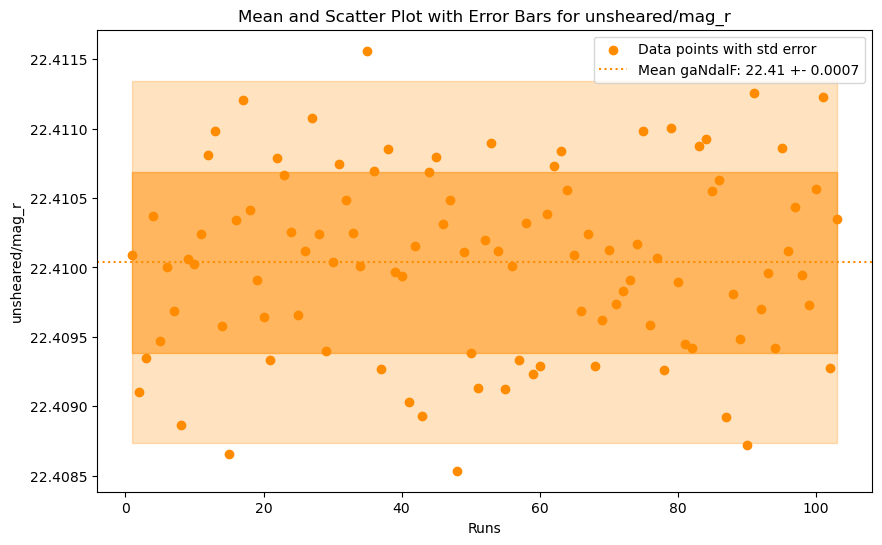

In [140]:
mean_value = np.mean(dict_means["unsheared/mag_r"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_r"]))
std_dev = np.std(dict_means["unsheared/mag_r"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_r"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_r"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean gaNdalF: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_r")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_r")
plt.legend()
plt.show()

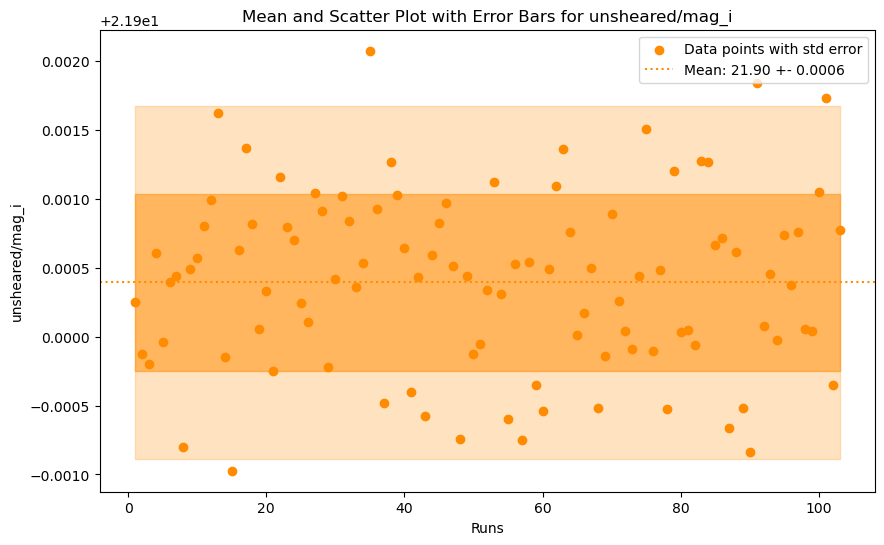

In [138]:
mean_value = np.mean(dict_means["unsheared/mag_i"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_i"]))
std_dev = np.std(dict_means["unsheared/mag_i"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_i"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_i"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_i")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_i")
plt.legend()
plt.show()

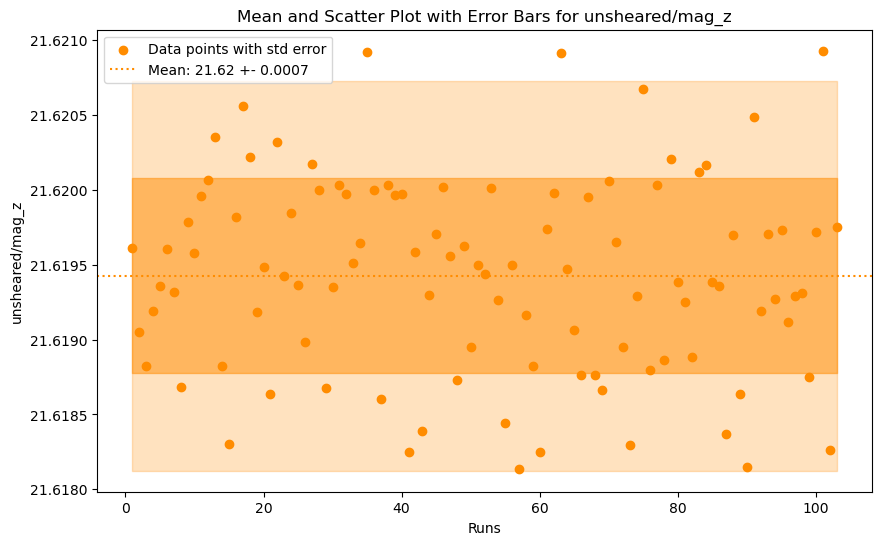

In [139]:
mean_value = np.mean(dict_means["unsheared/mag_z"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_z"]))
std_dev = np.std(dict_means["unsheared/mag_z"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_z"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_z"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_z")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_z")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
FILE_1 = '~/Output/sompz_paper/mean_gandalf.csv'
df_sompz_gandalf = pd.read_csv(FILE_1)

mean_bins = ['Mean Bin 1', 'Mean Bin 2', 'Mean Bin 3', 'Mean Bin 4']
bins = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']
means = df_sompz_gandalf[mean_bins].mean()
stds = df_sompz_gandalf[mean_bins].std()
# Balrog reference lines
balrog_values = [0.3255, 0.5086, 0.7470, 0.9320]
balrog_error = 0.01  # Given error for Balrog in each bin

ylim = [(0.31, 0.38), (0.49, 0.56), (0.72, 0.79), (0.91, 0.98)]

#lst_file_names = []
#lst_full_file_names = []
#for file_name in df_sompz_gandalf["File Name"]:
#    lst_file_names.append(file_name.replace("/project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/", ""))
#    lst_full_file_names.append(file_name)
#df_sompz_gandalf["File Name"] = lst_file_names

# Create a figure with 4 subplots (one for each Mean Bin)
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
fig.suptitle("Mean Redshift for Each Tomographic Bin Across 100 Bootstrap Runs")
 
for i, col in enumerate(mean_bins):
    # Plot mean line for each Mean Bin as a dashed line
    axes[i].axhline(means[col], color='#ff8c00', linestyle='--', linewidth=1, label=f'gaNdalF {means[col]:.4f} +- {stds[i]:.3f} of {col}')
    
    # Plot Balrog reference line as a solid line
    axes[i].axhline(balrog_values[i], color='#51a6fb', linestyle='-', linewidth=1, label=f'Balrog {balrog_values[i]:.4f} +- 0.01')
    
    # Fill the ±1σ and ±2σ ranges around the mean
    axes[i].fill_between(df_sompz_gandalf.index, means[col] - stds[col], means[col] + stds[col], 
                         color='#ff8c00', alpha=0.5)
    axes[i].fill_between(df_sompz_gandalf.index, means[col] - 2*stds[col], means[col] + 2*stds[col], 
                         color='#ff8c00', alpha=0.25)
    
    axes[i].axhline(balrog_values[i] - balrog_error, color='#51a6fb', alpha=0.5, linestyle='-.', linewidth=1)
    axes[i].axhline(balrog_values[i] + balrog_error, color='#51a6fb', alpha=0.5, linestyle='-.', linewidth=1,)
    
    # Add shaded area for Balrog error range
    #axes[i].fill_between(df_sompz_gandalf.index, balrog_values[i] - balrog_error, balrog_values[i] + balrog_error,
    #                     color='#51a6fb', alpha=0.5)
    # Add shaded area for Balrog error range
    #axes[i].fill_between(df_sompz_gandalf.index, balrog_values[i] - 2*balrog_error, balrog_values[i] + 2*balrog_error,
    #                     color='#51a6fb', alpha=0.25)
    
    # Plot each Mean Bin as a line
    axes[i].plot(df_sompz_gandalf.index, df_sompz_gandalf[col], color='#ff8c00', label=f'{col}', marker='o')
    
    # Set labels and legend
    axes[i].set_ylabel(f"<z> Tomographic {bins[i]}")
    axes[i].legend(loc='upper right')
    axes[i].set_ylim(ylim[i])
    axes[i].set_xlim(0, len(df_sompz_gandalf)-1)

axes[-1].set_xlabel("Run Number")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

/scratch-local/slurm-job-tmp-3237606/ipykernel_499/3507819285.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].axhline(means[col], color='#ff8c00', linestyle='--', linewidth=1, label=f'gaNdalF {means[col]:.4f} +- {stds[i]:.3f} of {col}')


In [63]:
import os
import shutil

def move_files(file_names, destination_folder):
    """
    Moves each file in the file_names list to the specified destination folder.

    Parameters:
    - file_names (list): List of file paths to be moved.
    - destination_folder (str): Path to the destination folder.
    """
    # Ensure the destination folder exists
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Move each file to the destination folder
    for file_path in file_names:
        if os.path.isfile(file_path):
            try:
                shutil.move(file_path, destination_folder)
                print(f"Moved: {file_path} -> {destination_folder}")
            except Exception as e:
                print(f"Failed to move {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")



In [67]:
# Example usage:
# destination_folder = '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/'  # Path to the destination
# move_files(lst_full_file_names, destination_folder)

Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_17-12_run1_gandalf_Test_samples_2336951.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_17-12_run1_gandalf_Test_samples_2336951.h5' already exists
Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_18-43_run2_gandalf_Test_samples_2336837.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_18-43_run2_gandalf_Test_samples_2336837.h5' already exists
Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_20-16_run3_gandalf_Test_samples_2337788.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_20-16_run3_gandalf_Test_samples_2337788.h5' already exists
Moved: /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_21-19_run1_gandalf_Test_samples_2335